# Linear regression model to predict beer consumption

## Kaggle beer consumption challenge 
### Dataset previously treated
### Datasets: https://www.kaggle.com/datasets/dongeorge/beer-consumption-sao-paulo

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

In [40]:
df = pd.read_csv('../Dados/Consumo_cerveja.csv', sep=';')
df

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900
...,...,...,...,...,...,...,...
360,27/12/2015,24.00,21.1,28.2,13.6,1,32307
361,28/12/2015,22.64,21.1,26.7,0.0,0,26095
362,29/12/2015,21.68,20.3,24.1,10.3,0,22309
363,30/12/2015,21.38,19.3,22.4,6.3,0,20467


In [41]:
df.describe().round(2)

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


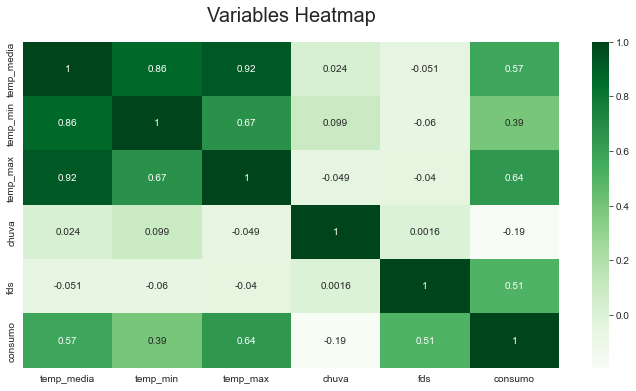

In [42]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot = True, cmap='Greens')
plt.title('Variables Heatmap', fontsize = 20, pad = 20)
plt.show()

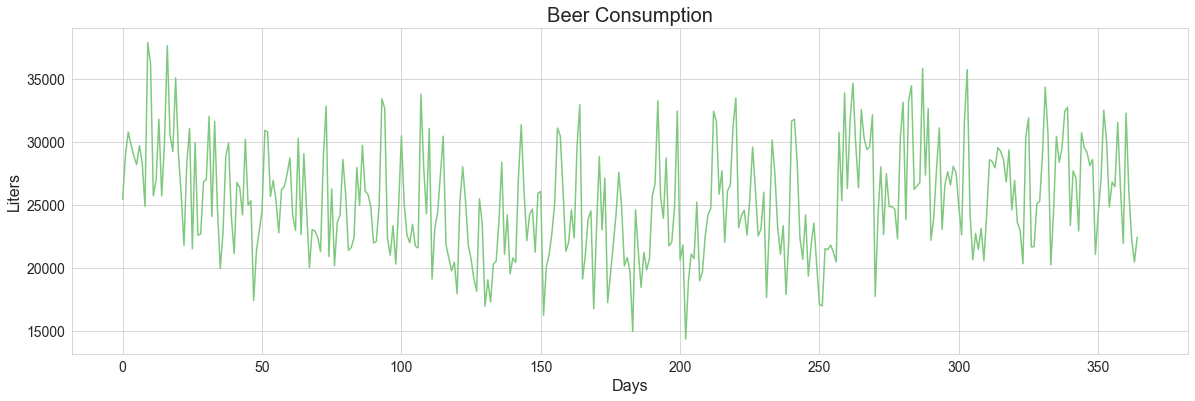

In [43]:
#Checking if the dependent variable has a structure break
fig, ax = plt.subplots(figsize=(20, 6))

ax.set_title('Beer Consumption', fontsize=20)
ax.set_ylabel('Liters', fontsize=16)
ax.set_xlabel('Days' , fontsize=16)
ax = df['consumo'].plot(fontsize=14)

<AxesSubplot:title={'center':'Beer Consumption'}, xlabel='Weekend', ylabel='Liters'>

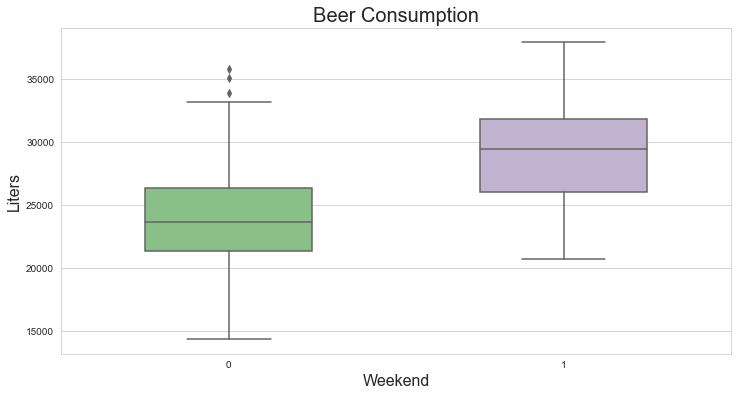

In [44]:
#Checking the outliers
sns.set_palette('Accent')
sns.set_style('whitegrid')
ax = sns.boxplot(y= 'consumo', x= 'fds', data=df, width= 0.5)
ax.figure.set_size_inches(12,6)
ax.set_title('Beer Consumption', fontsize=20)
ax.set_ylabel('Liters', fontsize=16)
ax.set_xlabel('Weekend', fontsize=16)
ax

In [45]:
df.isnull().sum()

data          0
temp_media    0
temp_min      0
temp_max      0
chuva         0
fds           0
consumo       0
dtype: int64

In [46]:
df.duplicated().sum()

0

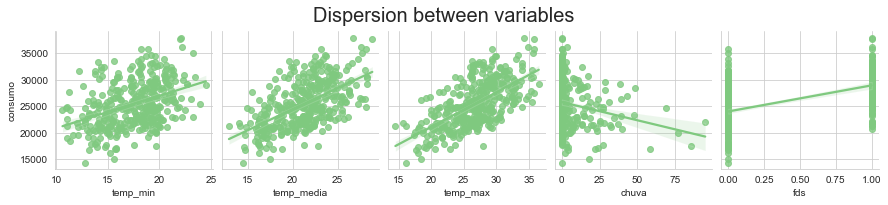

In [47]:
ax = sns.pairplot(df, y_vars='consumo' , x_vars=['temp_min' , 'temp_media' , 'temp_max' , 'chuva' , 'fds'] , kind= 'reg')
ax.fig.suptitle('Dispersion between variables' , fontsize=20 , y= 1.10)
ax

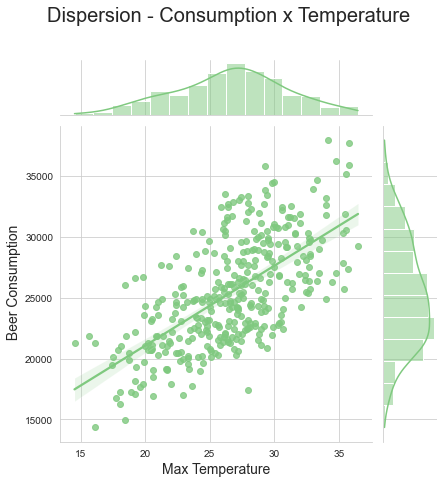

In [48]:
ax = sns.jointplot(x= 'temp_max' , y= 'consumo' , data=df, kind='reg')
ax.fig.suptitle('Dispersion - Consumption x Temperature ' , fontsize=20 , y= 1.10)
ax.set_axis_labels('Max Temperature' , ' Beer Consumption', fontsize=14)
ax

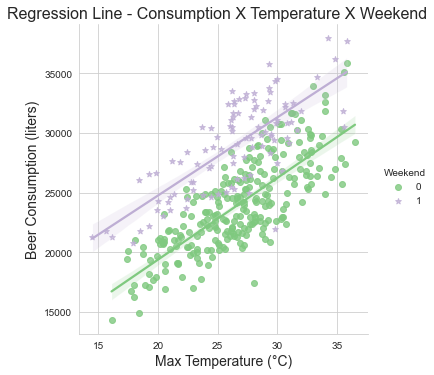

In [49]:
ax = sns.lmplot(x="temp_max", y="consumo", data=df, hue="fds", markers=['o', '*'], legend=False)
ax.fig.suptitle('Regression Line - Consumption X Temperature X Weekend', fontsize=16, y=1.02)
ax.set_xlabels("Max Temperature (°C)", fontsize=14)
ax.set_ylabels("Beer Consumption (liters)", fontsize=14)
ax.add_legend(title="Weekend")
ax

In [50]:
#first let's do a random separation by creating a training model and then a test model
#then let's prepare the general dataset (dataframe data)
#let's divide the dataframe into a series that will have the dependent variable (consumption)
#then another dataframe with the explanatory variables (chuva, fds and temp)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 

y = df['consumo']
X = df[['temp_max', 'chuva', 'fds']]

#Separates data between training and data with random data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2811)

#Creating and instantiating the model
model = LinearRegression()
model.fit(X_train, y_train)

#Getting the coefficient of determination (R²) 
#which is a summary measure that tells you how much the regression line fits the data
print('R² = {}' .format(model.score(X_train, y_train).round(2)))

R² = 0.73


In [51]:
#Generating predictions for test data using the predict() method
#Getting the coefficient of determination (R²) for test data
y_pred = model.predict(X_test)
print('R² = {}' .format(metrics.r2_score(y_test, y_pred).round(2)))

R² = 0.69


In [52]:
X_test[0:1]

,temp_max,chuva,fds
5,30.5,12.2,0


In [60]:
entrada = X_test[0:1]
model.predict(entrada)[0]

26094.901775262017

In [61]:
#Saving the model
import pickle
output = open('beer_consumption_model' , 'wb')
pickle.dump(model, output)
output.close()

In [65]:
#Opening saved model for testing
import pickle

model = open('beer_consumption_model','rb')
model_beer = pickle.load(model)
model.close()

temp_max = 30.5
chuva = 12.2
fds = 0

entrada = [[temp_max, chuva, fds]]

print('$ {0:.2f}'.format(model_beer.predict(entrada)[0]))


$ 26094.90


In [67]:
#Making a interative simulator for test the model
from ipywidgets import widgets, HBox, VBox
from IPython.display import display

temp_max = widgets.Text(description="Temperature")
chuva = widgets.Text(description="Precipitation")
fds = widgets.Text(description="Weekend")

button = widgets.Button(description="Simulate")

left = VBox([temp_max, chuva, fds])
inputs = HBox([left])

def simulator(sender):
    enter=[[
                float(temp_max.value if temp_max.value else 0), 
                float(chuva.value if chuva.value else 0), 
                float(fds.value if fds.value else 0)
             ]]
    print('$ {0:.2f}'.format(model_beer.predict(enter)[0]))
    
button.on_click(simulator)

In [68]:
display(inputs, button)

Button(description='Simulate', style=ButtonStyle())

$ 26094.90
$ 32656.81
$ 35524.27
